In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [3]:
df.size

7072296

In [4]:
df = df.drop('id', axis=1)
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [5]:
df = df.drop('year', axis=1)
df.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [6]:
df['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           336776 non-null  int64  
 1   day             336776 non-null  int64  
 2   dep_time        328521 non-null  float64
 3   sched_dep_time  336776 non-null  int64  
 4   dep_delay       328521 non-null  float64
 5   arr_time        328063 non-null  float64
 6   sched_arr_time  336776 non-null  int64  
 7   arr_delay       327346 non-null  float64
 8   carrier         336776 non-null  object 
 9   flight          336776 non-null  int64  
 10  tailnum         334264 non-null  object 
 11  origin          336776 non-null  object 
 12  dest            336776 non-null  object 
 13  air_time        327346 non-null  float64
 14  distance        336776 non-null  int64  
 15  hour            336776 non-null  int64  
 16  minute          336776 non-null  int64  
 17  time_hour 

In [8]:
missing_values = df.isnull().sum()
missing_values

month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [9]:
# Replace missing dep_time with sched_dep_time
df.loc[df["dep_time"].isnull(), "dep_time"] = df["sched_dep_time"]

# Set dep_delay to 0 for these replaced values
df.loc[df["dep_time"] == df["sched_dep_time"], "dep_delay"] = 0

# Verify changes
df[["dep_time", "sched_dep_time", "dep_delay"]].isnull().sum()

dep_time          0
sched_dep_time    0
dep_delay         0
dtype: int64

In [10]:
df.loc[df["arr_time"].isnull(), "arr_time"] = df["sched_arr_time"]
df.loc[df["arr_time"] == df["sched_arr_time"], "arr_delay"] = 0

df.loc[df["arr_delay"].isnull(), "arr_delay"] = df["arr_time"] - df["sched_arr_time"]

In [11]:
df[["arr_time", "sched_arr_time", "arr_delay"]].isnull().sum()

arr_time          0
sched_arr_time    0
arr_delay         0
dtype: int64

In [12]:
df.loc[df["air_time"].isnull(), "air_time"] = df["arr_time"] - df["dep_time"]
df.isnull().sum()

month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [13]:
df = df.drop("tailnum",axis=1)
df.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,name
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [14]:
df = df.drop("name",axis=1)
df.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [15]:
df = df.drop("time_hour",axis=1)
df.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0


/tmp/ipykernel_16302/1284372897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["carrier"], y=df["arr_delay"], estimator=lambda x: x.mean(), palette="viridis")


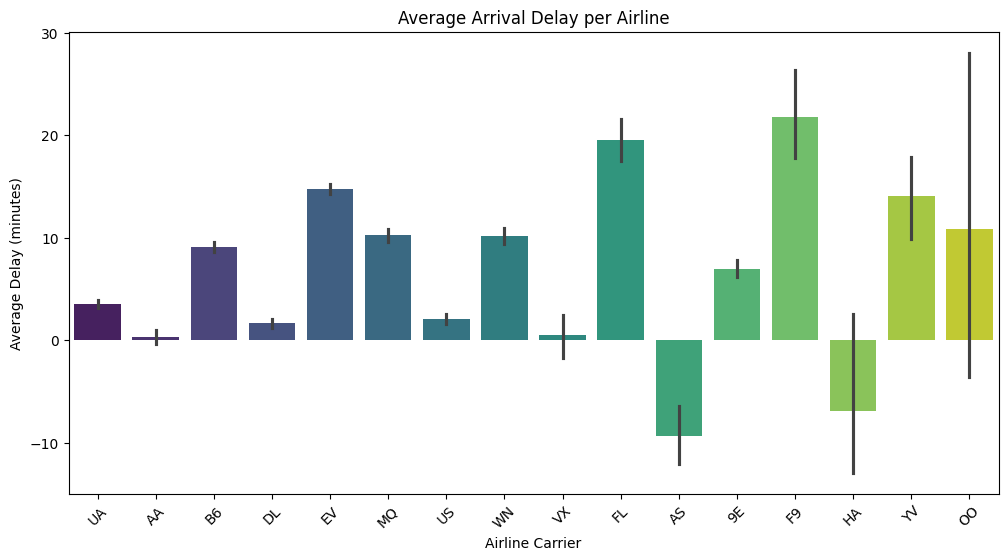

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["carrier"], y=df["arr_delay"], estimator=lambda x: x.mean(), palette="viridis")
plt.title("Average Arrival Delay per Airline")
plt.xlabel("Airline Carrier")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

In [17]:
le_carrier = LabelEncoder()
le_origin = LabelEncoder()
le_dest = LabelEncoder()

df["carrier"] = le_carrier.fit_transform(df["carrier"])
df["origin"] = le_origin.fit_transform(df["origin"])
df["dest"] = le_dest.fit_transform(df["dest"])

print(df[["carrier", "origin", "dest"]].head())

   carrier  origin  dest
0       11       0    43
1       11       2    43
2        1       1    58
3        3       1    12
4        4       2     4


In [18]:
print(df['carrier'].unique())
print(df['origin'].unique())
print(df['dest'].unique())

[11  1  3  4  5  9 12 14 13  7  2  0  6  8 15 10]
[0 2 1]
[ 43  58  12   4  69  35  42  54  71 100  49  90  30  11  48  61  32  83
  92  74  16  23  14  29  95  62  93 104  59  89  82  99  96  80  24  47
  21  56  75  84  28  22  97  65  46  55  40  10   5  13  73  98  33   6
  79  45  86  19  41  52  27   2   7  57  60  37  26  15  81  38  36  53
  70  85  88  72  91  68  25  66  94 101 103  67  78  31  76   9  18  39
  17  63  34  77   1   8   0  44  64  87  50  20 102   3  51]


In [19]:
df.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute
0,1,1,517.0,515,2.0,830.0,819,11.0,11,1545,0,43,227.0,1400,5,15
1,1,1,533.0,529,4.0,850.0,830,20.0,11,1714,2,43,227.0,1416,5,29
2,1,1,542.0,540,2.0,923.0,850,33.0,1,1141,1,58,160.0,1089,5,40
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,3,725,1,12,183.0,1576,5,45
4,1,1,554.0,600,-6.0,812.0,837,-25.0,4,461,2,4,116.0,762,6,0


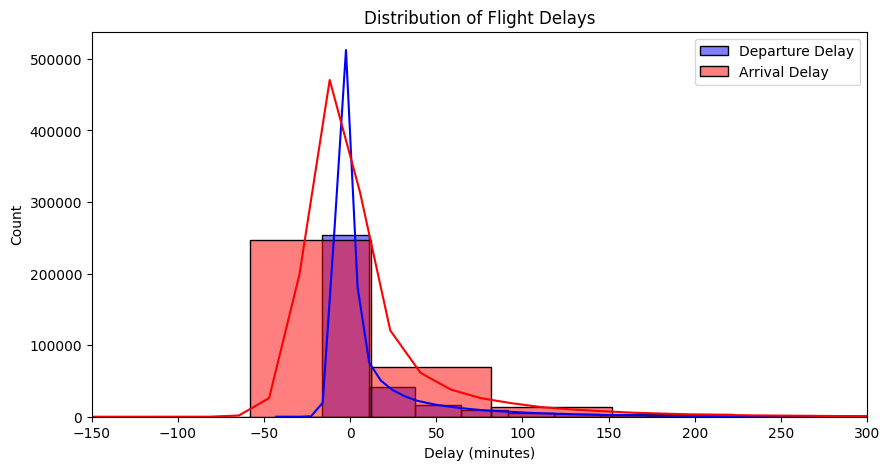

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df["dep_delay"], bins=50, kde=True, color="blue", label="Departure Delay")
sns.histplot(df["arr_delay"], bins=50, kde=True, color="red", label="Arrival Delay")
plt.xlim(-150, 300)
plt.legend()
plt.title("Distribution of Flight Delays")
plt.xlabel("Delay (minutes)")
plt.show()

/tmp/ipykernel_16302/1284372897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["carrier"], y=df["arr_delay"], estimator=lambda x: x.mean(), palette="viridis")


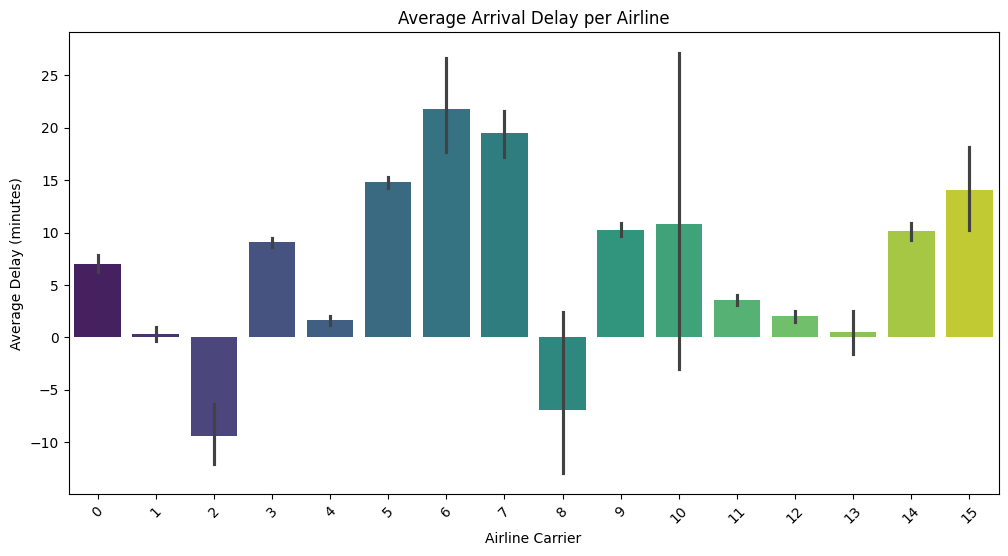

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["carrier"], y=df["arr_delay"], estimator=lambda x: x.mean(), palette="viridis")
plt.title("Average Arrival Delay per Airline")
plt.xlabel("Airline Carrier")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_16302/2469344021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["origin"], palette="Set2")


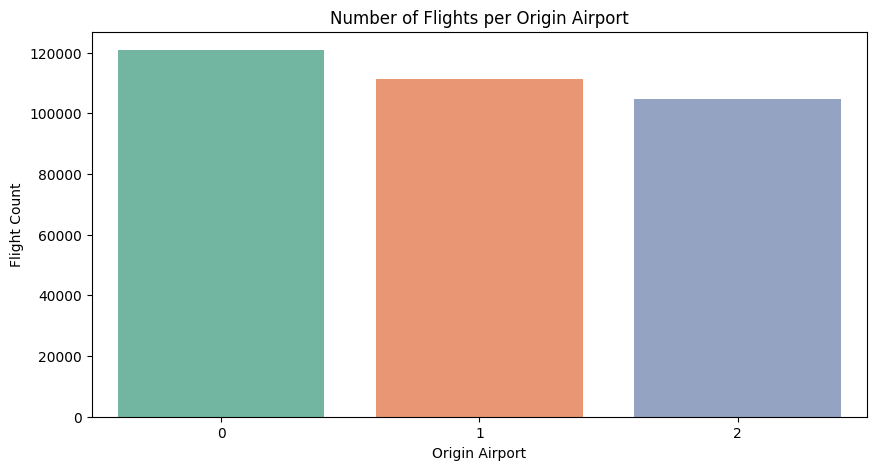

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["origin"], palette="Set2")
plt.title("Number of Flights per Origin Airport")
plt.xlabel("Origin Airport")
plt.ylabel("Flight Count")
plt.show()

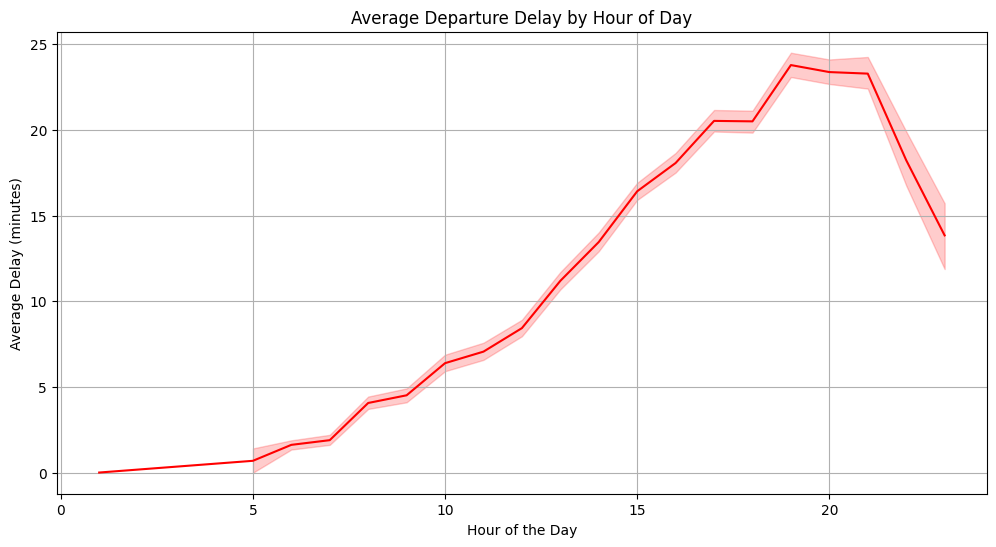

In [23]:
df["hour"] = df["sched_dep_time"] // 100  # Extract hour from scheduled departure time

plt.figure(figsize=(12, 6))
sns.lineplot(x=df["hour"], y=df["dep_delay"], estimator=lambda x: x.mean(), color="red")
plt.title("Average Departure Delay by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Delay (minutes)")
plt.grid()
plt.show()